# supervised learning soal nomer 2
## nama: mochamad dani hartanto
## nim: 170411100090
## kelas: DSI UTM A

In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [94]:
dataset = pd.read_csv('../soal 1/export_dataframe2.csv',index_col=0)

In [95]:
dataset

,MIT,ME3,ME2,ME1,EXC,VAC,POX,segmen
NUC,,,,,,,,
0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,4
0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,4
0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,4
0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,3
0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...
0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,2
0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4


In [96]:
dataset.shape

(1484, 8)

In [97]:
dataset.segmen.unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [98]:
dataset["segmen"].value_counts()

3    408
1    381
4    323
0    230
2    142
Name: segmen, dtype: int64

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1484 entries, 0.58 to 0.65
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIT     1484 non-null   float64
 1   ME3     1484 non-null   float64
 2   ME2     1484 non-null   float64
 3   ME1     1484 non-null   float64
 4   EXC     1484 non-null   float64
 5   VAC     1484 non-null   float64
 6   POX     1484 non-null   float64
 7   segmen  1484 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 104.3 KB


C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


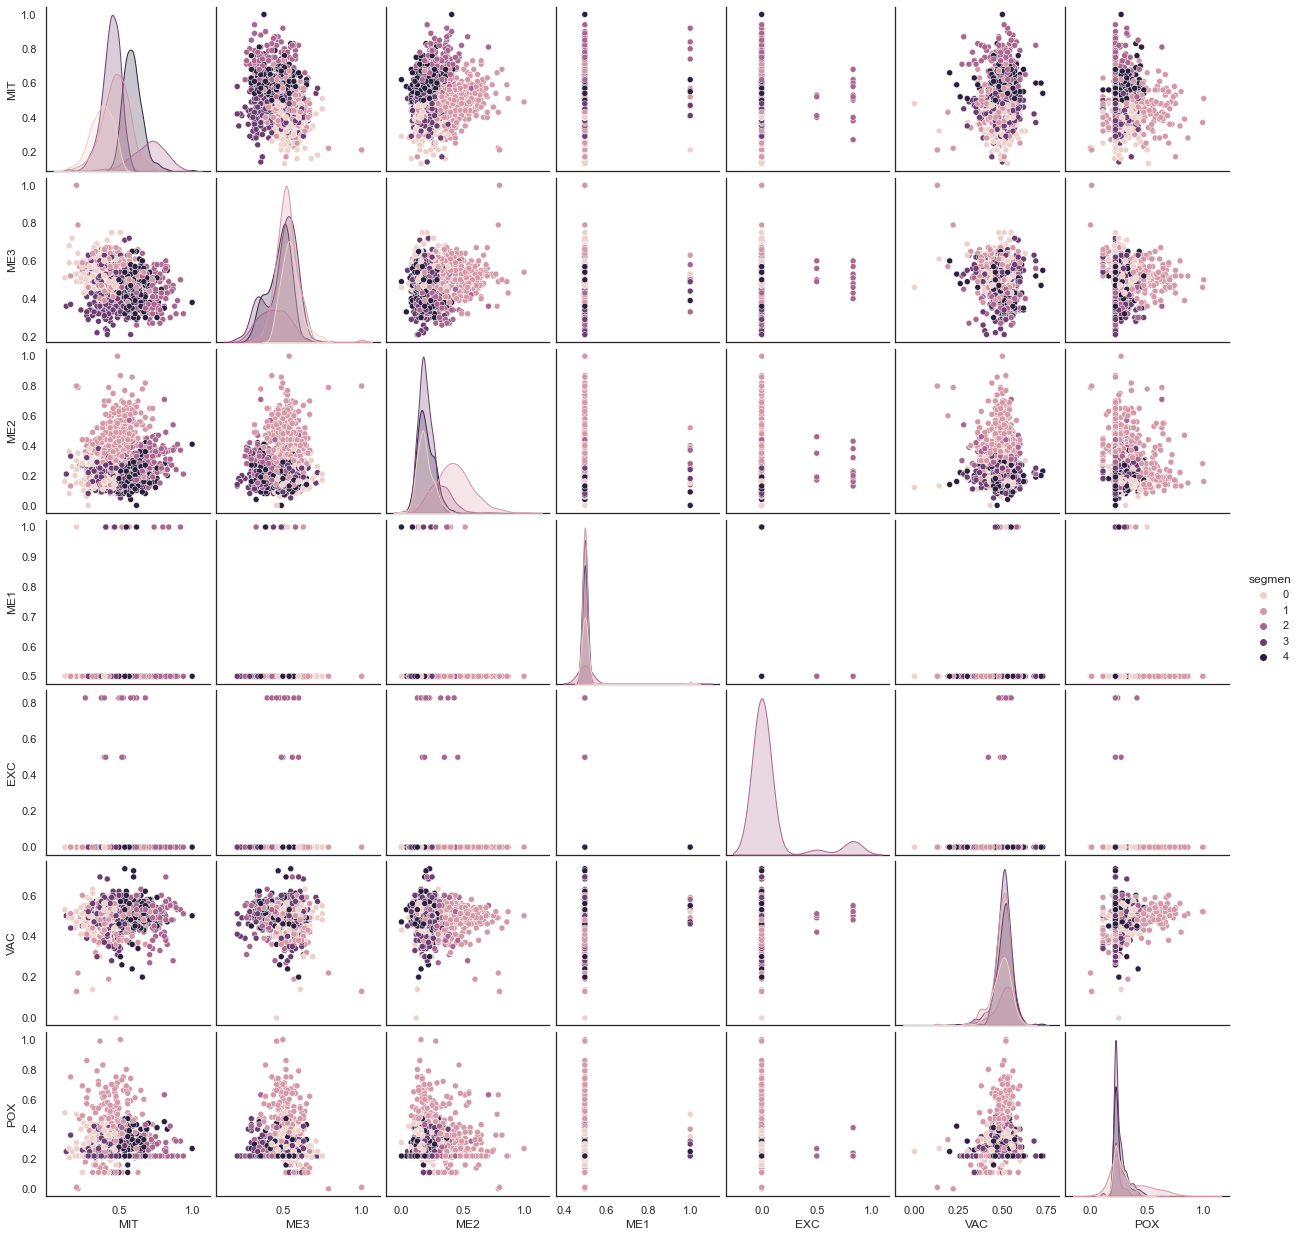

In [100]:
sns.pairplot(dataset, hue='segmen')

In [106]:
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(dataset[dataset.columns[:-1]],dataset['segmen'],test_size = 0.2)

In [107]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [108]:
hasilPrediksi = knn.predict(x_test)
print(classification_report(hasilPrediksi, y_test))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        37
           1       0.92      0.91      0.92        77
           2       0.75      0.90      0.82        30
           3       0.80      0.69      0.75        95
           4       0.77      0.79      0.78        58

    accuracy                           0.78       297
   macro avg       0.76      0.78      0.77       297
weighted avg       0.79      0.78      0.78       297



In [109]:
print(hasilPrediksi)
print(y_test.tolist())

[1 1 4 4 2 1 1 1 3 4 1 2 4 4 3 4 0 4 1 3 4 0 3 1 1 0 3 2 0 2 3 3 4 4 0 3 4
 3 1 1 4 1 3 1 4 1 3 0 3 3 3 1 3 4 1 1 1 4 1 4 4 4 2 4 3 3 3 4 0 1 0 3 1 4
 1 1 0 4 1 1 3 4 4 3 3 1 3 3 3 3 1 4 4 1 1 3 3 3 1 1 3 3 3 3 1 0 4 1 1 2 3
 0 3 4 4 0 0 3 3 0 3 3 1 3 3 2 4 2 2 2 3 4 4 0 0 1 0 1 3 2 0 3 4 3 3 4 0 3
 3 4 4 3 3 0 3 2 4 3 4 1 1 3 4 4 0 1 4 4 1 1 3 3 4 3 4 0 0 3 3 3 3 2 1 4 3
 4 1 0 1 2 1 2 1 3 1 3 3 0 2 3 4 4 1 3 1 3 2 1 4 0 2 3 3 1 3 4 1 1 2 3 3 3
 3 3 4 2 1 4 0 2 1 0 1 3 3 3 3 1 0 1 0 4 1 2 1 2 2 3 3 2 4 3 3 0 3 3 1 3 4
 1 3 1 1 1 4 1 3 2 1 0 0 1 3 1 3 0 1 0 0 3 2 3 3 1 2 0 3 1 3 1 2 4 1 1 2 1
 4]
[0, 0, 4, 4, 2, 1, 1, 1, 3, 4, 1, 2, 4, 4, 3, 2, 0, 4, 1, 3, 2, 0, 3, 1, 1, 0, 3, 2, 0, 2, 3, 3, 4, 4, 0, 3, 4, 0, 1, 1, 4, 1, 3, 1, 4, 1, 3, 0, 0, 4, 0, 2, 4, 4, 1, 1, 1, 4, 0, 4, 4, 4, 2, 4, 0, 3, 3, 2, 1, 1, 3, 4, 1, 4, 1, 1, 0, 4, 1, 1, 3, 4, 4, 3, 3, 1, 3, 3, 3, 3, 1, 4, 4, 1, 1, 4, 3, 3, 1, 1, 3, 3, 3, 3, 1, 0, 4, 1, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 2, 4, 2, 2, 2, 3, 4,

In [112]:
knn.predict([[0.14,0.14,0.13,0.15,0.1,0.53,0.22]])

array([3], dtype=int64)